> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - NCIS and Census Data - Ikechukwu Ogbuchi

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

### Dataset Description 

The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.
The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.



## 2. Question(s) for Analysis

- What census data is most associated with high gun per capita? 
- Which states have had the highest growth in gun registrations? 
- What is the overall trend of gun purchases?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## 3. Data Wrangling

> *In this section, I loaded the data, checked for cleanliness, looked at the shape, orientation, trimmed off irrelevant columns, missing values and prepared my dataset for analysis. 

### General Properties
> From the loaded data as shown in the code cells run below, we see from the Data Cleaning subsection that the gun dataframe 12485 rows and 27 columns. We also see that the census data frame in its initial orientation has 85 rows and 52 columns

> Further scrutiny of the census_df data showed that column "Fact Note" has the lowest number of Non-null values 28 values out of 85 rows which was deleted. 
> The gun dataframe had a lot of missing values which I replaced with the mean of each column.
> After transposing the census_df data, I found from wrangling that the columns after 'FIPS Score' were all empty. So I traced the index of the column and sliced the census_df up till that index.
>Next section was Exploratory data analysis

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#Loading Data for NCIS gun data
gun_df = pd.read_excel('Database_Ncis_and_Census_data/gun_data.xlsx')
#Database_Ncis_and_Census_data/US_Census_Data.csv
gun_df.head()


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
#loading NCIS Census data

census_df=pd.read_csv('Database_Ncis_and_Census_data/US_Census_Data.csv')
census_df.head(5)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


### Observations
- For the gun data gun_df, the states are in a column named state, but in census_df, It appears these states are column headers. 
- I want to transpose the census data to use the population column described as 'Fact' as column names, and to make the column headers become a column instead
- Will check for missing values first before transposing

In [5]:
#Checking number of cols and rows with shape 
census_df.shape


(85, 52)

In [6]:
#85 Rows and 52 columns for Census data
#now check missing values
census_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

#### From the above, "Fact Note" has only 28 values and the rest missing, will terminate the column then transpose Census df 

In [7]:
#dropping Fact note
census_df.drop(columns=['Fact Note'],inplace=True)

In [8]:
#Transposing
census_df=census_df.set_index('Fact').T
census_df

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,17.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Georgia,"10,310,371","9,688,680",6.40%,"9,687,653",6.40%,7.10%,24.40%,25.70%,13.10%,10.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Resetting index, so state names are not index
census_df = census_df.reset_index()
census_df.head(2)

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#checking new shape
census_df.shape

(50, 86)


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

#### In this section Data Cleaning, I will check for all duplicates, nan values, describe the data and preview all column names

In [11]:
#Checking for duplicates in gun_df and census_df
print(sum(census_df.duplicated()))
print(sum(gun_df.duplicated()))

0
0


In [12]:
#Checking for sum of nan values in both census and gun df
print(gun_df.isna().sum())
print(census_df.isna().sum().tail(25))

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64
Fact
Veteran-owned firms, 2012            

##### We can see there are a lot of missing values, for the census data which was transposed, most of the data is occurring towards the end columns. will remove the columns with all missing values and replace them with mean

In [13]:
#previewing shape of both datasets
print(gun_df.shape)
print(census_df.shape)

(12485, 27)
(50, 86)


In [14]:
#filling all missing values from gun_df with mean of each row value
gun_df=gun_df.fillna(gun_df.mean)
#checking again for missing values
print(gun_df.isna().sum())

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64


In [15]:
#Doing the same for Census_df, but have to remove the last tail rows with all missing values first
#previewing all rows
census_df.columns

Index([                                                                                 'index',
                                                 'Population estimates, July 1, 2016,  (V2016)',
                                           'Population estimates base, April 1, 2010,  (V2016)',
        'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
                                                            'Population, Census, April 1, 2010',
                                       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
                                                'Persons under 5 years, percent, April 1, 2010',
                                      'Persons under 18 years, percent, July 1, 2016,  (V2016)',
                                               'Persons under 18 years, percent, April 1, 2010',
                                  'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
                              

In [16]:
#As seen from the cell checking census_df nan.. the all missing columns start after 'FIPS Code' column. 
#will eliminate every other column after that
#Getting location of FIPS Code
print(census_df.columns.get_loc("FIPS Code"))



65


In [17]:
census_df=census_df.iloc[:,0:66]
census_df

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""
5,Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,...,"547,352","284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89","""08"""
6,Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,...,"326,693","187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36","""09"""
7,Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,...,"73,418","38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54","""10"""
8,Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,...,"2,100,187","1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76","""12"""
9,Georgia,"10,310,371","9,688,680",6.40%,"9,687,653",6.40%,7.10%,24.40%,25.70%,13.10%,...,"929,864","480,578","376,506","371,588","538,893","96,787","800,585",168.4,"57,513.49","""13"""


In [18]:
#Double checking columns are deleted
census_df.columns

Index(['index', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 20

In [19]:
#Checking for nan values again for all rows
print(census_df.isna().sum())

Fact
index                                                                                    0
Population estimates, July 1, 2016,  (V2016)                                             0
Population estimates base, April 1, 2010,  (V2016)                                       0
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    0
Population, Census, April 1, 2010                                                        0
                                                                                        ..
Veteran-owned firms, 2012                                                                0
Nonveteran-owned firms, 2012                                                             0
Population per square mile, 2010                                                         0
Land area in square miles, 2010                                                          0
FIPS Code                                                                            

In [20]:
#Double checking all missing values sum across all columns
print(census_df.isna().sum().sum())

0


<a id='eda'></a>
## 4. Exploratory Data Analysis

> Here, I **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. Will perform univariate and bivariate analysis using seaborn. And performing both single and multiple variable explorations 


### Research Question 1 What census data is most associated with high gun per capita?

 - to get the census data that is most associated with high gun per capita, we have to merge the two datasets on the a similar column. Then divide the totals value from gun_df by latest population data
 - the similar column is named index on census_df, so have to remap the column name

In [21]:
#Updating seaborn first
!pip install -U seaborn

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


[Text(0.5, 1.0, 'Univariate plot Gun Totals')]

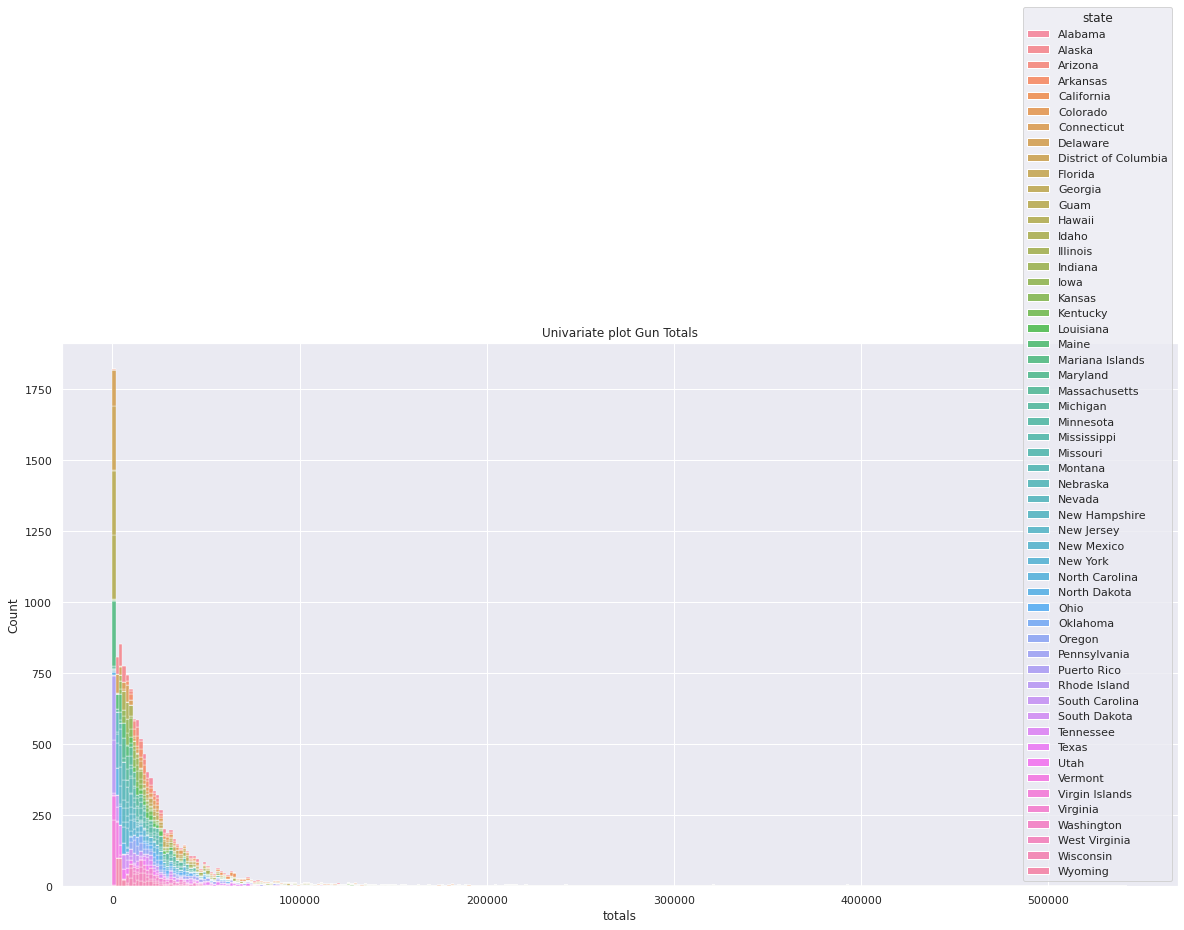

In [26]:
#Before looking into the research question, will do a single variable analysis from the gun_df which is the "totals" column.
import seaborn as sns
#plotting the gun dataframe as a histogram, colored by state and type of histogram is stacked
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(data=gun_df, x="totals", hue="state", multiple="stack").set(title="Univariate plot Gun Totals")



- looking at the univariate plot above in gun_totals colored by state, the gun registration by number mostly lie between 0 and 100,000 per case. 

In [51]:
#Will break down month column in gun_df to year
gun_df['month'] = pd.to_datetime(gun_df['month'])


In [53]:
#Getting month and year out of it
gun_df['year'] = gun_df['month'].dt.year
gun_df['month_num'] = gun_df['month'].dt.month

[Text(0.5, 1.0, 'Bivariate plot Gun Totals over time')]

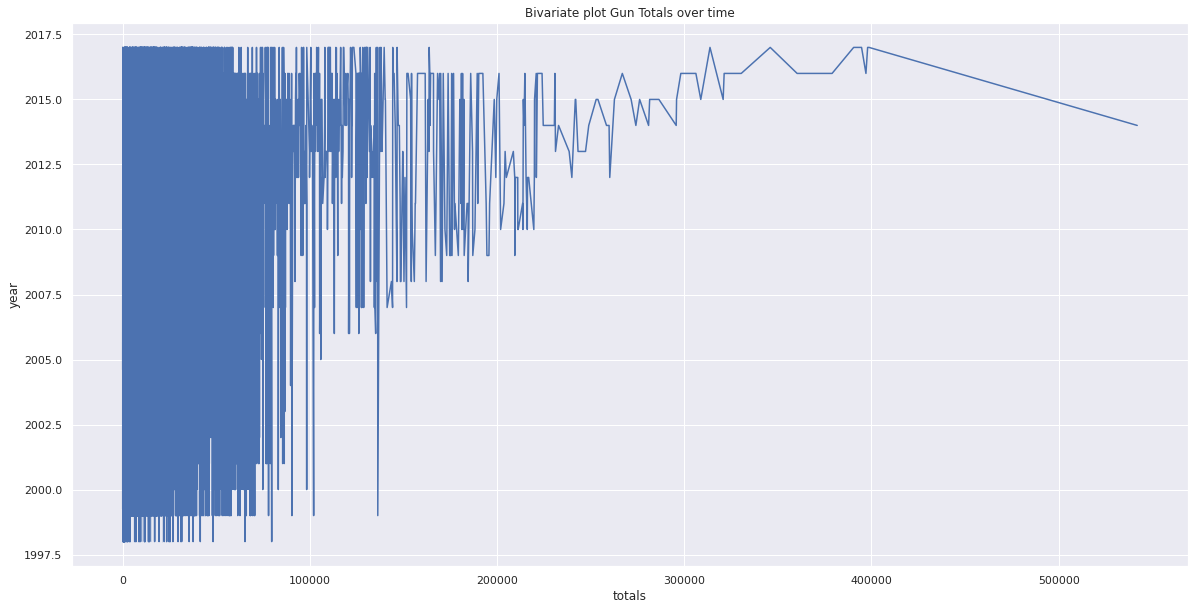

In [54]:
#Doing Bivariate analysis with time and Gun totals
#Before looking into the research question, will do a single variable analysis from the gun_df which is the "totals" column.
import seaborn as sns
#plotting the gun dataframe as a histogram, colored by state and type of histogram is stacked
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=gun_df, x="totals", y="year").set(title="Bivariate plot Gun Totals over year")



**We could see from the Bivariate analysis that between 2012 and 2015, there was a spike in Gun totals of over 500,000

In [27]:
 #raise SystemExit("Stop right there!")

In [28]:
gun_df.head(2)
#previewing gun_df

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717,0,5734,6320,221,317,0,15,...,0,0,0,9,16,3,0,0,3,32019
1,2017-09,Alaska,209,2,2320,2930,219,160,0,5,...,0,0,0,17,24,1,0,0,0,6303


In [29]:
census_df.head(2)

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""


In [33]:
#renaming index column to state
census_df= census_df.rename(columns= {'index':'state'})
census_df.head(5)


Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [34]:
#now we join the two datasets gun_df and census_df on state
#using an inner join because I want to keep common states
#first checking again shape of both
print(census_df.shape)
print(gun_df.shape)



(50, 66)
(12485, 27)


In [48]:
#Have to aggregate the 'state' column in gun_df , so it has unique state values aggregated by sum of all columns
#Before merging with census_df
grouped_gun_df=gun_df.groupby('state').sum().reset_index()
grouped_gun_df.head()


,state,multiple,totals
0,Alabama,105230,6706079
1,Alaska,28904,1137643
2,Arizona,84979,4425714
3,Arkansas,61919,3752633
4,California,207864,19014063


In [36]:
grouped_gun_df.shape
#Checking new shape

(55, 3)

In [55]:
#joining grouped gun_df and census df on 'state' using inner join
joined_df = grouped_gun_df.merge(census_df, on='state', how='inner')
print(joined_df.shape)
joined_df

(50, 68)


,state,multiple,totals,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,105230,6706079,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,28904,1137643,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,84979,4425714,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,61919,3752633,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,207864,19014063,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""
5,Colorado,306871,6058482,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,...,"547,352","284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89","""08"""
6,Connecticut,8024,3168126,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,...,"326,693","187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36","""09"""
7,Delaware,8269,491369,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,...,"73,418","38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54","""10"""
8,Florida,242702,11695777,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,...,"2,100,187","1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76","""12"""
9,Georgia,88396,7209942,"10,310,371","9,688,680",6.40%,"9,687,653",6.40%,7.10%,24.40%,...,"929,864","480,578","376,506","371,588","538,893","96,787","800,585",168.4,"57,513.49","""13"""


##### After merging both documents on state, will now look at state with highest gun per capita

In [56]:
#columns to use from the gun_df is 'totals', and for the census data 'Population estimates, July 1, 2016,  (V2016)'
#checking if columns are of same data type
print(joined_df['Population estimates, July 1, 2016,  (V2016)'].dtypes)
print(joined_df['totals'].dtypes)

object
int64


In [57]:
#they are different, so conversion needed for 'Population estimates' column
#looking at how object looks
joined_df['Population estimates, July 1, 2016,  (V2016)'].unique


<bound method Series.unique of 0      4,863,300
1        741,894
2      6,931,071
3      2,988,248
4     39,250,017
5      5,540,545
6      3,576,452
7        952,065
8     20,612,439
9     10,310,371
10     1,428,557
11     1,683,140
12    12,801,539
13     6,633,053
14     3,134,693
15     2,907,289
16     4,436,974
17     4,681,666
18     1,331,479
19     6,016,447
20     6,811,779
21     9,928,300
22     5,519,952
23     2,988,726
24     6,093,000
25     1,042,520
26     1,907,116
27     2,940,058
28     1,334,795
29     8,944,469
30       2081015
31      19745289
32      10146788
33        757952
34      11614373
35       3923561
36       4093465
37      12784227
38       1056426
39       4961119
40        865454
41       6651194
42    27,862,596
43     3,051,217
44       624,594
45     8,411,808
46     7,288,000
47     1,831,102
48     5,778,708
49       585,501
Name: Population estimates, July 1, 2016,  (V2016), dtype: object>

In [58]:
#Have to strip the commas from this data, then convert to int or float
joined_df['Population estimates, July 1, 2016,  (V2016)'] = joined_df['Population estimates, July 1, 2016,  (V2016)'].str.replace(',', '').astype(float)
joined_df['Population estimates, July 1, 2016,  (V2016)'].dtypes

dtype('float64')

In [45]:
#looking at columns
joined_df.columns

Index(['state', 'multiple', 'totals',
       'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asi

In [59]:
#now we can perform the operation and find the highest gun per capita state
joined_df['gun_per_capita']=joined_df['totals']/joined_df['Population estimates, July 1, 2016,  (V2016)']
joined_df.loc[:,['gun_per_capita','totals','Population estimates, July 1, 2016,  (V2016)','state']].sort_values('gun_per_capita',ascending=False)

,gun_per_capita,totals,"Population estimates, July 1, 2016, (V2016)",state
16,6.707822,29762434,4436974.0,Kentucky
25,1.807279,1884124,1042520.0,Montana
47,1.752436,3208889,1831102.0,West Virginia
1,1.533431,1137643,741894.0,Alaska
49,1.527420,894306,585501.0,Wyoming
43,1.421817,4338273,3051217.0,Utah
40,1.404710,1215712,865454.0,South Dakota
0,1.378915,6706079,4863300.0,Alabama
3,1.255797,3752633,2988248.0,Arkansas
33,1.250000,947440,757952.0,North Dakota


[Text(0.5, 1.0, 'Line plot gun_per_capita by state')]

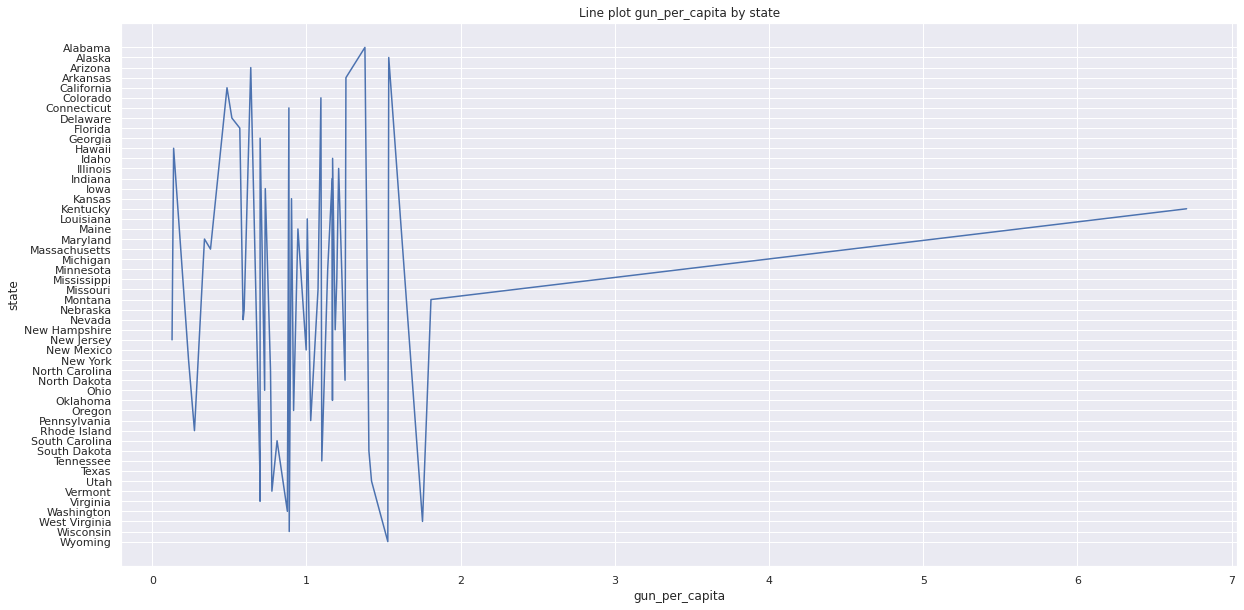

In [63]:
#Looking at a plot of gun_per_capita by state
import seaborn as sns
#plotting the joined dataframe as a lineplot with gun per capita and state
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=joined_df, x="gun_per_capita", y="state").set(title="Line plot gun_per_capita by state")

In [64]:
#looking at the lowest ones
joined_df.loc[:,['gun_per_capita','totals','Population estimates, July 1, 2016,  (V2016)','state']].sort_values('gun_per_capita',ascending=True)

,gun_per_capita,totals,"Population estimates, July 1, 2016, (V2016)",state
29,0.128107,1145846,8944469.0,New Jersey
10,0.138307,197580,1428557.0,Hawaii
31,0.235187,4643828,19745289.0,New York
38,0.273441,288870,1056426.0,Rhode Island
19,0.338348,2035652,6016447.0,Maryland
20,0.377482,2571321,6811779.0,Massachusetts
4,0.484435,19014063,39250017.0,California
7,0.516109,491369,952065.0,Delaware
8,0.567414,11695777,20612439.0,Florida
27,0.589035,1731797,2940058.0,Nevada


## Results
- from results, we can tell that the states **Kentucky, Montana and West Virginia** have the highest gun per capita

### Research Question 2   Which states have had the highest growth in gun registrations? 

In [65]:
# the column "Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)" would be helpful
#looking at the data type first
joined_df["Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)"].dtypes

dtype('O')

In [66]:
#there is need to convert it from Object type O to float
#previewing one value
joined_df["Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)"][1]

'4.50%'

In [67]:
#We strip the percentage sign and convert to float, the select state colum and sort in decreasing order to see states 
#.. with highest growth in gun registration
joined_df["Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)"] = joined_df["Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)"].str.replace('%', '').astype(float)
joined_df["Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)"].dtypes

dtype('float64')

In [68]:
#Now sort and select state column to see states with highest growth
joined_df.loc[:,["Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)",'state']].sort_values("Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)",ascending=False)


,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",state
42,10.800,Texas
43,10.400,Utah
5,10.200,Colorado
8,9.600,Florida
27,8.900,Nevada
2,8.400,Arizona
46,8.400,Washington
11,7.400,Idaho
9,6.400,Georgia
7,6.000,Delaware


[Text(0.5, 1.0, 'Highest growth in gun registrations year')]

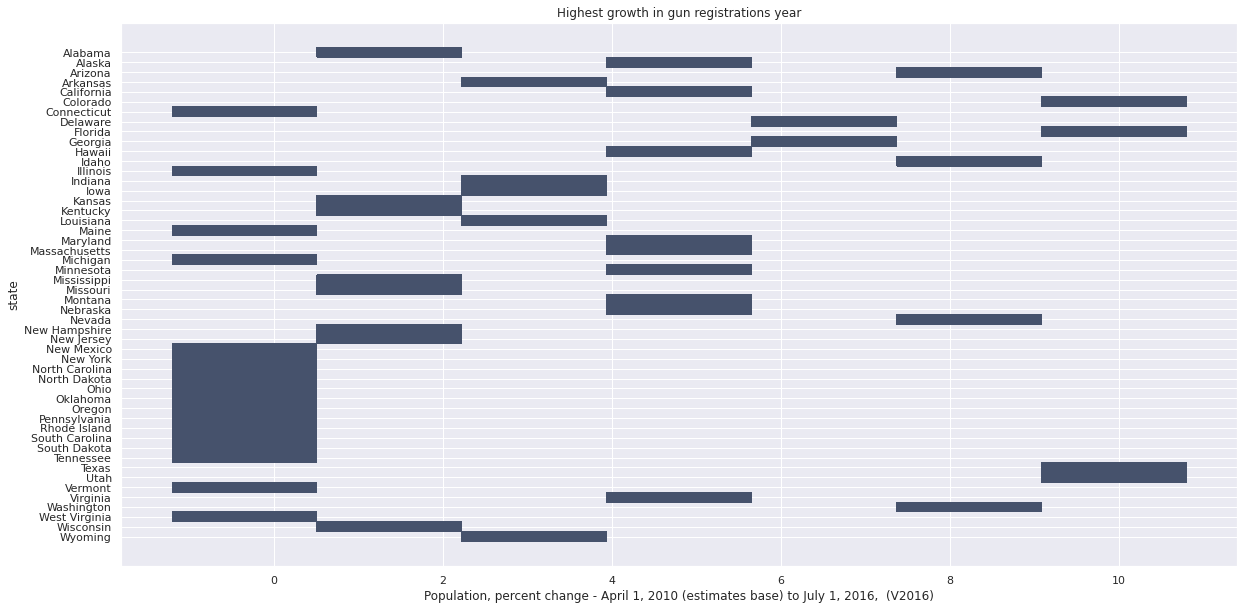

In [70]:
#Quick visualization of histogram bar to see the state with the highest gun registration
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(data=joined_df, y="state", x="Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)").set(title="Highest growth in gun registrations year")

The highest growth rates in Texas, Utah, Colorado and Florida can be clearly seen.

In [71]:
#looking at states with lowest gun growth rates
joined_df.loc[:,["Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)",'state']].sort_values("Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)",ascending=True)


,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",state
47,-1.200,West Virginia
44,-0.200,Vermont
12,-0.200,Illinois
38,0.003,Rhode Island
37,0.006,Pennsylvania
34,0.007,Ohio
30,0.011,New Mexico
31,0.019,New York
35,0.046,Oklahoma
41,0.048,Tennessee


 From the selected above, it is easy to see **Texas, Utah, Colorado and Florida** have the highest growth in gun registrations

<a id='conclusions'></a>
## 5. Conclusions

> Found that these 5 states **Kentucky, Montana, West Virginia, Alaska and Wyoming** are states with highest gun per capita
while **New Jersey, Hawaii, New_york, Rhode_island and Maryland** are least gun per capita states. Gun control enforcement should be tightened in the areas identified to have higher gun per capita.

> Also found **Texas, Utah, Colorado, Florida and Nevada** are the top 5 states with highest gun registration growth states, while **West Virginia, Vermont, Illinois, Rhode Island, and Pennsylvania** are lowest. More needs to be done to ensure that only those mentally and legally able to weild firearms are the ones registering for it.

## 6. Limitations

> * There is no much information on the dataset about crime rates in these states, so we cannot make any inferences based on that from just population and gun registration data.
> * More data on the occupation or vocation of the census data might be helpful in exploring more questions and correlations

In [73]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0